# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused if patients show up for their appointments or not. A number of characteristics about the patient are included in each row which include the following columns:

- **PatientId**: The ID of the patient.
- **AppointmentID**: The ID of the appointment.
- **Gender**: Patient's gender.
- **ScheduledDay**: The appointment's scheduled day.
- **AppointmentDay**: The day of the appointment.
- **Age**: Patient's age.
- **Neighbourhood**: Location of the hospital.
- **Scholarship**: Whether the patient is enrolled in the Bolsa Família welfare program.
- **Hypertension**, **Diabetes**, **Alcoholism**, **Handicap**: Binary indicators for these conditions.
- **SMS_received**: Whether the patient received an SMS reminder.
- **No_show**: Whether the patient missed the appointment.


### Question(s) for Analysis
1. What is the overall no_show rate?
2. How do factors like gender and scholarship affect no_show rates?
3. Does receiving an SMS reminder reduce no_shows?
4. Is there a relationship between waiting time (difference between ScheduledDay and AppointmentDay) and no_shows?

In [25]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [26]:
# Load the dataset
df = pd.read_csv('no_show_appointments.csv')
# Display numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)
# Display the rows
print(df.head())
# Check for info
print(df.info())
# Check null value
print(df.isnull().sum())
# Summary
print(df.describe())


        PatientId  AppointmentID Gender          ScheduledDay  \
0  29872499824296        5642903      F  2016-04-29T18:38:08Z   
1 558997776694438        5642503      M  2016-04-29T16:08:27Z   
2   4262962299951        5642549      F  2016-04-29T16:19:04Z   
3    867951213174        5642828      F  2016-04-29T17:29:31Z   
4   8841186448183        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0   


### Data Cleaning

In [27]:
# Fixing column names
df.columns = df.columns.str.lower().str.replace('-', '_')
# Fixing data types
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
# Rename columns that has typos
df = df.rename(columns={
    'hipertension': 'hypertension',
    'handcap': 'handicap'
})

<a id='eda'></a>
## Exploratory Data Analysis

### What is the overall no_show rate?

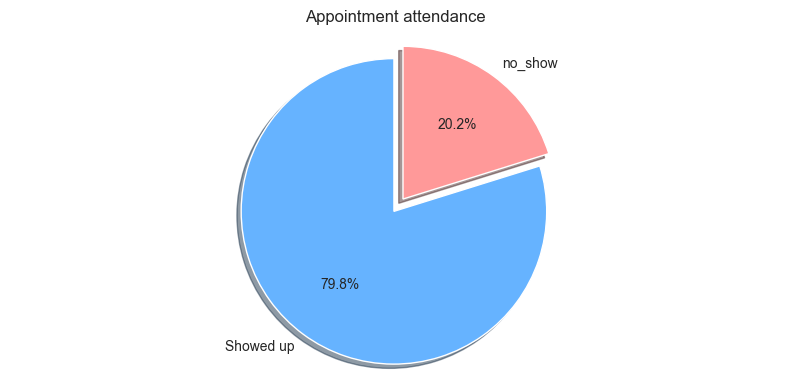

In [28]:
# Calculate overall no_show
no_show_count = df['no_show'].sum()
total_appointments = len(df)

# Create a piechart
plt.figure(figsize=(8, 4))
labels = ['Showed up', 'no_show']
sizes = [total_appointments - no_show_count, no_show_count]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Appointment attendance')
plt.tight_layout()
plt.show()

### How do factors like gender, and scholarship affect no_show rates?

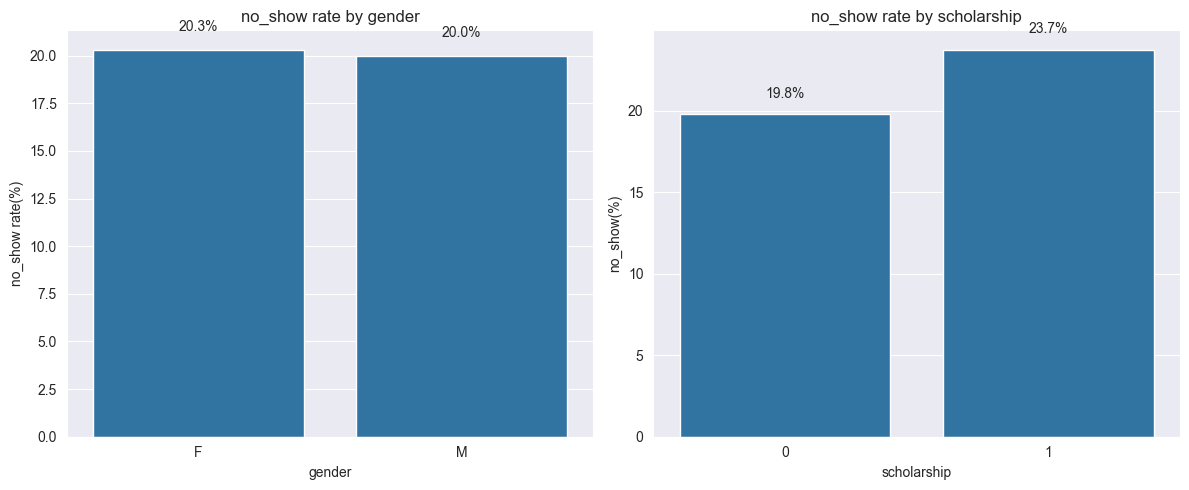

In [29]:
# Calculate no_show rate by gender and scholarship
gender_noshow = df.groupby('gender')['no_show'].agg(['mean', 'count'])
gender_noshow['mean'] = gender_noshow['mean'] * 100

scholarship_noshow = df.groupby('scholarship')['no_show'].agg(['mean', 'count'])
scholarship_noshow['mean'] = scholarship_noshow['mean'] * 100

# Change figsize for better visualization
plt.figure(figsize=(12, 5))

# Plt 1: no_show rate by gender
plt.subplot(1, 2, 1)
sns.barplot(x=gender_noshow.index, y=gender_noshow['mean'])
plt.title('no_show rate by gender')
plt.xlabel('gender')
plt.ylabel('no_show rate(%)')
for i, v in enumerate(gender_noshow['mean']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

# Plt 2: no_show rate by scholarship
plt.subplot(1, 2, 2)
sns.barplot(x=scholarship_noshow.index, y=scholarship_noshow['mean'])
plt.title('no_show rate by scholarship')
plt.xlabel('scholarship')
plt.ylabel('no_show(%)')
for i, v in enumerate(scholarship_noshow['mean']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

### Does receiving an SMS reminder reduce no_show?

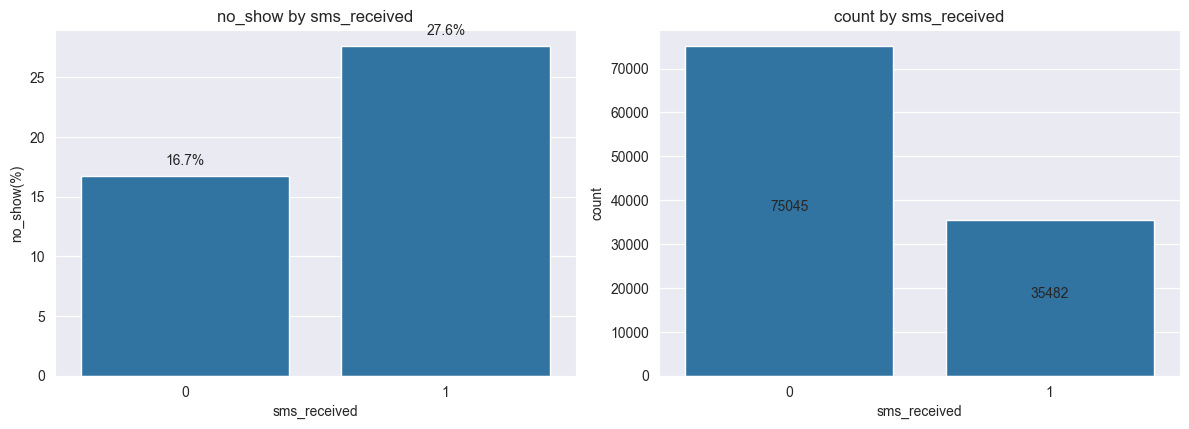

In [30]:
# Basic no_show rates by SMS status
sms_noshow = df.groupby('sms_received')['no_show'].agg(['mean', 'count'])
sms_noshow['mean'] = sms_noshow['mean'] * 100

# Change figsize for better visualization
plt.figure(figsize=(12, 8))

# Plt 1: no_show rate by sms_received
plt.subplot(2, 2, 1)
sns.barplot(x=sms_noshow.index, y=sms_noshow['mean'])
plt.title('no_show by sms_received')
plt.xlabel('sms_received')
plt.ylabel('no_show(%)')
for i, v in enumerate(sms_noshow['mean']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

# Plt 2: count by sms_received
plt.subplot(2, 2, 2)
sns.barplot(x=sms_noshow.index, y=sms_noshow['count'])
plt.title('count by sms_received')
plt.xlabel('sms_received')
plt.ylabel('count')
for i, v in enumerate(sms_noshow['count']):
    plt.text(i, v/2, f"{int(v)}", ha='center')

plt.tight_layout()
plt.show()

### Is there a relationship between waiting time (difference between ScheduledDay and AppointmentDay) and no_shows?

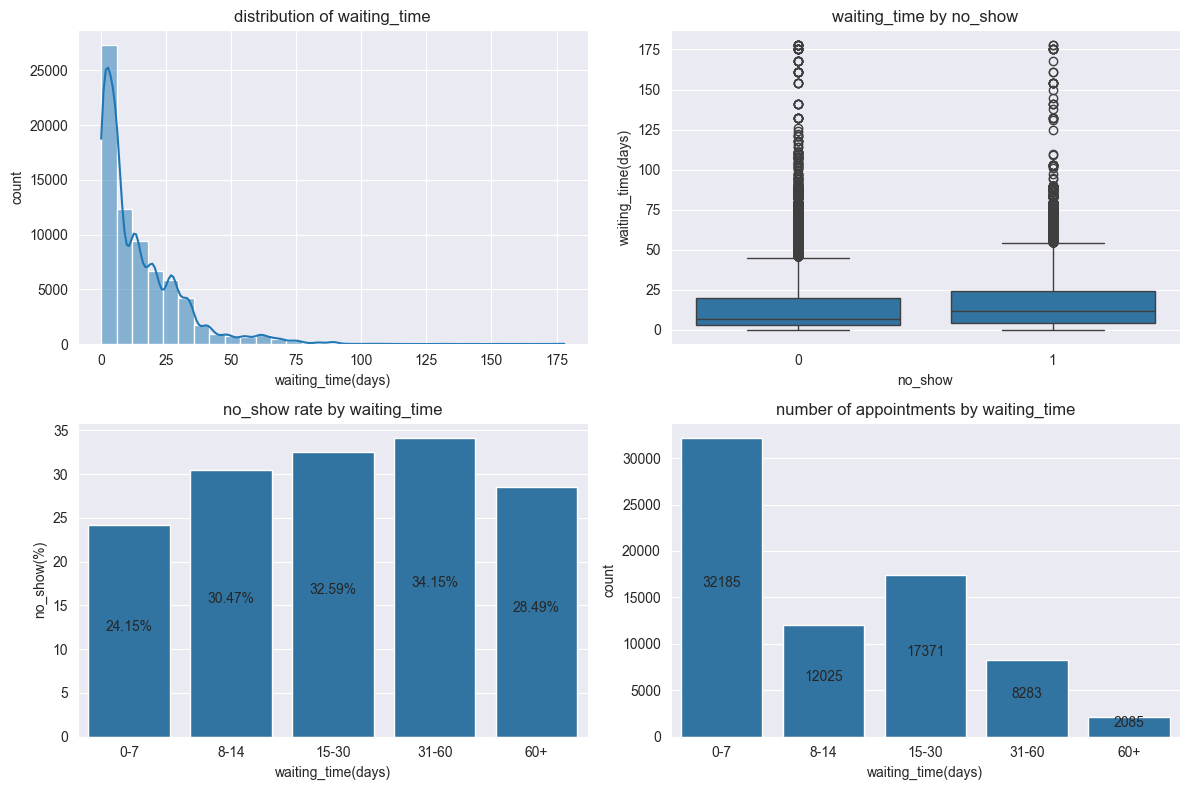

In [31]:
# Calculate waiting_time in days
df['waiting_time'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Remove negative waiting_time values
df = df[df['waiting_time'] >= 0]

# Change figsize for better visualization
plt.figure(figsize=(12, 8))


# Plt 1: Waiting time distribution
plt.subplot(2, 2, 1)
sns.histplot(df['waiting_time'], bins=30, kde=True)
plt.title('distribution of waiting_time')
plt.xlabel('waiting_time(days)')
plt.ylabel('count')

# Plt 2: waiting_time for show vs no_show
plt.subplot(2, 2, 2)
sns.boxplot(x='no_show', y='waiting_time', data=df)
plt.title('waiting_time by no_show')
plt.xlabel('no_show')
plt.ylabel('waiting_time(days)')

# Plt 3: no_show rate by waiting_time
bins = [0, 7, 14, 30, 60, df['waiting_time'].max()]
labels = ['0-7', '8-14', '15-30', '31-60', '60+']
df['waiting_time_bins'] = pd.cut(df['waiting_time'], bins=bins, labels=labels, right=False)

waiting_time_grouped = df.groupby('waiting_time_bins', observed=False)['no_show'].agg(['mean', 'count']).reset_index()
waiting_time_grouped['mean'] = waiting_time_grouped['mean'] * 100

plt.subplot(2, 2, 3)
sns.barplot(x='waiting_time_bins', y='mean', data=waiting_time_grouped)
plt.title('no_show rate by waiting_time')
plt.xlabel('waiting_time(days)')
plt.ylabel('no_show(%)')
for i, v in enumerate(waiting_time_grouped['mean']):
    plt.text(i, v/2, f"{v:.2f}%", ha='center')

# Plt 4: Number of appointments by waiting_time
plt.subplot(2, 2, 4)
sns.barplot(x='waiting_time_bins', y='count', data=waiting_time_grouped)
plt.title('number of appointments by waiting_time')
plt.xlabel('waiting_time(days)')
plt.ylabel('count')
for i, v in enumerate(waiting_time_grouped['count']):
    plt.text(i, v/2, f"{v}", ha='center')

plt.tight_layout()
plt.show()

<a id='conclusions'></a>
## Conclusions

### What is the overall no_show rate?
Analysis revealed that ~20% of all appointments fail to show up. This indicates that no_shows are an issue in the system.

### How do factors like gender and scholarship affect no_show rates?
- **Gender**: There is a small variation in no_show rates by gender with women reporting slightly higher attendance rates than men.
- **Scholarship**: Patient enrolled Bolsa Família welfare program have greater no_show rate.

### Does receiving an SMS reminder reduce no_shows?
Patients who were assigned SMS reminder had lower no_show rate, but it is not significant because the no_show rate is high for patients assigned an SMS reminder.

### Is there a relationship between waiting time and no_shows?
The analysis supports the idea that longer waiting times are a deterrent to turnout. Reductions in appointments to longer waits may either indicate fewer patients being booked for these long waits, but of those booked, the probability of not showing up is higher.

### Limitations of the Analysis
1. **Correlation vs Causation**: This analysis only shows relationships and cannot be proven to have these without performing experiments.
2. **Confounding Variables**: Access to transportation and appointment urgency that are not accounted for in the data may affect no_show rates.
3. **Missing Context**: No information exists in the data about the kinds of appointments.

### Future Research Directions
1. Conduct controlled trials of diverse appointment reminder interventions besides SMS.
2. Examine the effectiveness of wait time reduction as a treatment for improved attendance.


In [35]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 529208 bytes to Investigate_a_Dataset.html
